[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/rbg-research/AI-Training/blob/main/vision-analytics/Introduction/OpenCV/Tutorial-1.ipynb)

# Basic Image Processing with OpenCV

**Image processing** is a set of computational techniques used to analyze, enhance or to extract any useful information from digital images.

**OpenCV** (Open Source Computer Vision Library) is a library of programming functions mainly aimed at image processing and computer vision. 

In [1]:
# Importing the necessary libraries for image processing
import cv2 # opencv  
import numpy as np # to perform matrix manipulations
from matplotlib import pyplot as plt # to draw inline pictures in the notebook

In [2]:
# Reading the uploaded image with OpenCV
input_image = cv2.imread('sample.jpg')

In [3]:
#To read the image from Google Drive run the following code

# from google.colab import drive
# drive.mount('/content/drive')
# input_image = cv2.imread('Path to image')

#To download the image from a url, run the following code

#!wget url_of_the_image_file
#input_image = cv2.imread('image_file_name')

## Image analysis

The command to display the image using opencv is cv2.imshow()  
But it doesn't work properly in google colab, so we are using matplotlib instead.

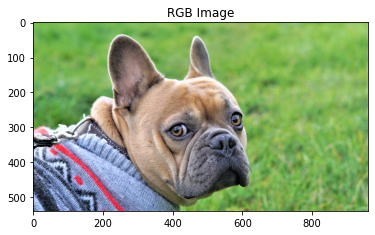

In [4]:
#Converting image from bgr(cv2) to rgb(matplotlib)
rgb_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB) 

# Displaying the image with matplotlib
plt.title("RGB Image")
plt.imshow(rgb_image)

Colour images usually have three channels, Red Green and Blue.  
Opencv reads the image in the order 'bgr' but matplotlib uses 'rgb'

In [5]:
# Class type of the image
print(type(input_image))

<class 'numpy.ndarray'>


We can see that the image is stored as an n-dimensional numpy array

In [6]:
# The shape of the image in pixels (x,y,z)
print(input_image.shape) 


(540, 960, 3)


Height of the image is 540 pixels, width is 960 pixels and number of channels is 3 (red, green and blue).

In [7]:
print(input_image[0,0,:]) # Values of Blue Green and Red channels for the first pixel

[124 221 154]


In [8]:
print(np.min(input_image)) # minimum pixel value 
print(np.max(input_image)) # maximum pixel value 

0
255


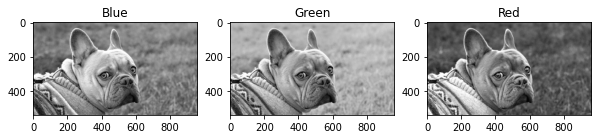

In [9]:
# Splitting the channels into red green and blue
b,g,r = cv2.split(input_image)

# Displaying all of the channels
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Blue")
ax1.imshow(r, cmap='gray')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Green")
ax2.imshow(g, cmap='gray')
ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Red")
ax3.imshow(b, cmap='gray')


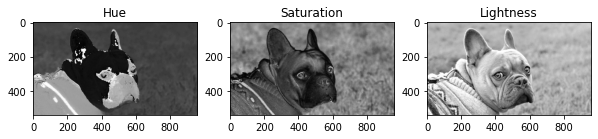

In [10]:
# Displaying hue, saturation, lightness of the image
hsv_image =cv2.cvtColor(input_image,cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title("Hue")
ax1.imshow(h, cmap='gray')
ax2 = fig.add_subplot(1,3,2)
ax2.set_title("Saturation")
ax2.imshow(s, cmap='gray')
ax3 = fig.add_subplot(1,3,3)
ax3.set_title("Lightness")
ax3.imshow(v, cmap='gray')

## Image Manipulations

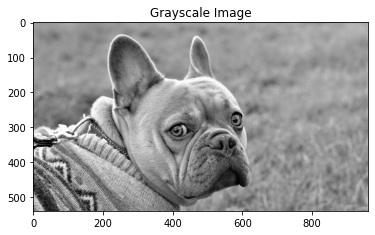

In [11]:
#Converting to Grayscale image

gray_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray image)

gray_image_inv = cv2.cvtColor(gray_image,cv2.COLOR_BGR2RGB)
plt.title("Grayscale Image") 
plt.imshow(gray_image_inv)


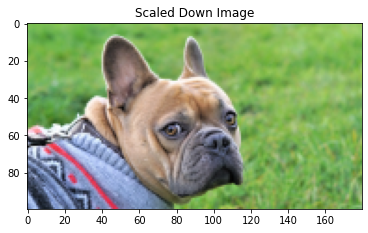

In [12]:
#Resizing the image (scaling down)
img_resized = cv2.resize(rgb_image,(180,100),interpolation = cv2.INTER_AREA)
plt.title("Scaled Down Image") 
plt.imshow(img_resized)

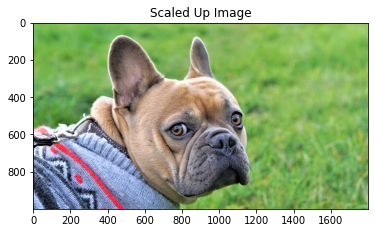

In [13]:
#Resizing the image (scaling up)
img_resized = cv2.resize(rgb_image,(1800,1000),interpolation = cv2.INTER_CUBIC)
plt.title("Scaled Up Image") 
plt.imshow(img_resized)

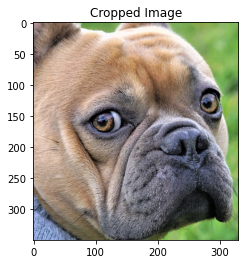

In [14]:
#Cropping the image according to pixels 
face = rgb_image[150:500, 300:630]
plt.title("Cropped Image") 
plt.imshow(face)

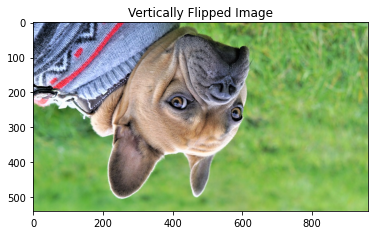

In [15]:
# Vertical Flipping
v_flipped_image =cv2.flip(rgb_image,0) 
plt.title("Vertically Flipped Image") 
plt.imshow(v_flipped_image)

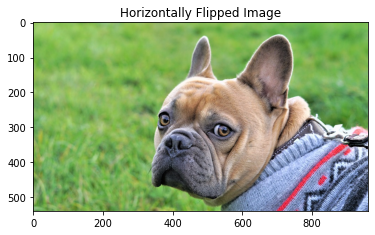

In [16]:
# Horizontal Flipping (Mirroring)
h_flipped_image =cv2.flip(rgb_image,1) 
plt.title("Horizontally Flipped Image") 
plt.imshow(h_flipped_image)

Original shape:  (540, 960, 3)
Transposed shape:  (960, 540, 3)


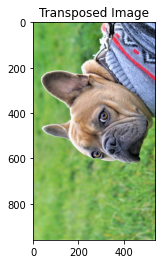

In [17]:
#Image transposed
transposed_image =cv2.transpose(rgb_image)
print("Original shape: ",rgb_image.shape)
print("Transposed shape: ",transposed_image.shape)
plt.title("Transposed Image") 
plt.imshow(transposed_image)

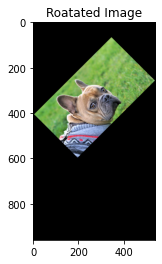

In [18]:
#Image roatation
height = rgb_image.shape[0]
width = rgb_image.shape[1]

#Rotating anti-clockwise in 45 degrees and scaling down by half
img_rotated = cv2.warpAffine(rgb_image, cv2.getRotationMatrix2D((height/2,width/2),45, 0.5),((height,width)))
plt.title("Roatated Image") 
plt.imshow(img_rotated)

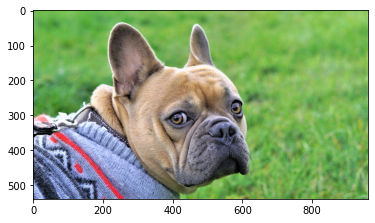

In [19]:
# Adjusting hue and saturation
hsv = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
h += 2
s += 2 
final_hsv = cv2.merge((h, s, v))
img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
plt.imshow(new_img)

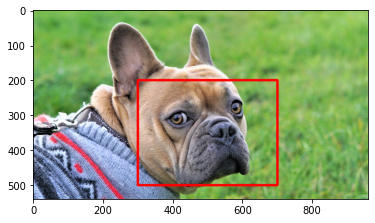

In [20]:
# Drawing shapes on the image
begin =(300,200) # origin
end = (700,500)  # opposite corner
color =(255,0,0) # red
thickness = 5 # line thickness
cv2.rectangle(rgb_image,begin,end,color,thickness)
plt.imshow(rgb_image) 

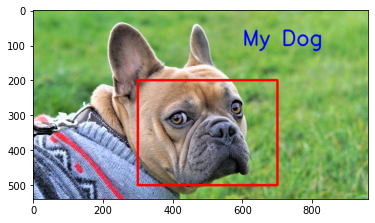

In [21]:
# Write text on the image
font = cv2.FONT_HERSHEY_SIMPLEX
org = (600,100) # orgin
fontScale = 2
color = (0, 0,255) # Blue
thickness = 3 # line thickness 

image = cv2.putText(rgb_image, 'My Dog', org, font,
				fontScale, color, thickness, cv2.LINE_AA)
plt.imshow(rgb_image)